In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from scipy.linalg import norm
import matplotlib as matplotlib
import matplotlib.pyplot as plt
from matplotlib import animation, rc
rc('animation', html='jshtml')
## Sætter grænseværdien for animationsstørrelsen op##
matplotlib.rcParams['animation.embed_limit'] = 2**128

# Vertikal drevet pendul - Kapitza pendulet

Indrettet mod positiv x mod højre og positiv y nedad, således at:
\begin{align}
x&=lsin(\phi)\\
y&=-lcos(\phi)-f(t)
\end{align}

hvor $f(t)=Acos(\omega t)$ er den vertikale forskydning som konsekvens af drivkraften, bliver bevægelseslign. uden småvinkelapp. jf. lagrangeformalismen: 

\begin{align}
ml^2\ddot{\phi}-mlf''(t)sin(\phi)-mlf'(t)cos(\phi)\dot{\phi}&=-ml\dot{\phi}f'(t)cos(\phi)-mglsin(\phi)\\
ml^2\ddot{\phi}-mlf''(t)sin(\phi)&=-mglsin(\phi),\quad f''(t)=-A\omega^2cos(\omega t)
\end{align}

omskriver til kobling:
\begin{align}
\frac{d\dot{\phi}}{dt}&=-\frac{gsin(\phi)}{l}-\frac{A\omega^2cos(\omega t)sin(\phi)}{l}\\
\frac{d\phi}{dt}&=\dot{\phi}
\end{align}


In [2]:
l = 3
g = 9.82
omega = 100
A = 0.5

tinit = 0
tfinal = 10
trange = [tinit,tfinal]

##startbetingelser
phi_0 = 0.9*np.pi
phi_prik_0 = 0

yinit = [phi_0,phi_prik_0]
ts = np.linspace(tinit, tfinal, 100000)

def dydt(t,y):
    phi = y[0]
    phi_prik = y[1]
    d_phi_prik_dt = (-g*np.sin(phi))/l-(A*omega**2*np.cos(omega*t)*np.sin(phi))/l
    d_phi_dt = phi_prik
    return [d_phi_dt,d_phi_prik_dt]

mysol = solve_ivp(dydt, trange, yinit, t_eval = ts,rtol=3e-14)
ts = mysol.t
phi = mysol.y[0]
phi_prik = mysol.y[1]


Text(0.5, 0, '$t$')

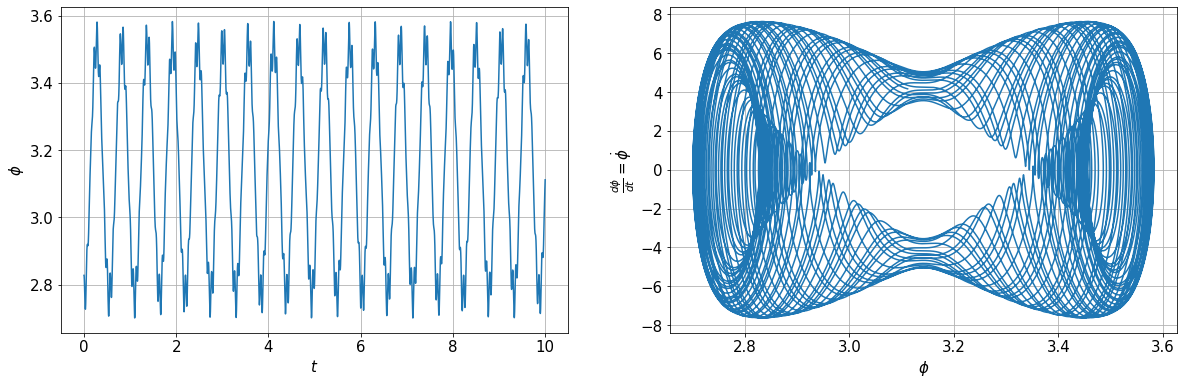

In [3]:

plt.rc('font', size=15)
fig,ax = plt.subplots(1,2,figsize=(20,6))
ax[1].plot(phi,phi_prik)
ax[0].plot(ts,phi)
ax[0].grid(),ax[1].grid()

ax[1].set_xlabel('$\phi$')
ax[1].set_ylabel(r'$\frac{d\phi}{dt}=\dot{\phi}$')

ax[0].set_ylabel('$\phi$')
ax[0].set_xlabel('$t$')


## Animerer

In [4]:
def angle_to_cartesian3(omega_val,amplitude,length,v,time_vals):
    x = np.sin(v)*length
    y = -np.cos(v)*length-amplitude*np.cos(omega_val*time_vals)
    return [x,y]

def angle_to_cartesian4(amplitude,omega_val,time_vals):
    y = -amplitude*np.cos(omega_val*time_vals)
    return y


xs1 = angle_to_cartesian3(omega,A,l,phi,ts)[0].tolist()
ys1 = angle_to_cartesian3(omega,A,l,phi,ts)[1].tolist()
ys2 = angle_to_cartesian4(A,omega,ts).tolist()

ys1[0],ys2[0]

(2.3531695488854605, -0.5)

In [ ]:
fig, ax = plt.subplots(figsize=(8, 8))

dot1, = ax.plot([],[],'ro',ms=8)
line1, = ax.plot([],[],color='black')
dot2, = ax.plot([],[],'ro',ms=8)

tracer, = ax.plot([],[],linewidth = 1, color='green')

def update(i):
    dot1.set_data(xs1[i],ys1[i])
    line1.set_data([0,xs1[i]],[ys2[i],ys1[i]])
    dot2.set_data(0,ys2[i])
    tracer.set_data(xs1[0:i+1],ys1[0:i+1])
    
    return line1, dot1, dot2, tracer

ax.plot([0,0],[-A,A],linestyle='--',color='black')
ax.plot([-7,7],[0,0],linestyle='-',color='black')

ax.set_xlim(-7,7)
ax.set_ylim(-7,7)
anim = animation.FuncAnimation(fig,
                               update,
                               frames=len(ts),
                               interval=10, 
                               blit=True,
                               repeat_delay=0)
anim